# 🧠 Precision in Progress: Manchester City's 2022 Premier League Performance Review

## Introduction

The 2022 Premier League season saw Manchester City once again at the summit of English football, finishing with a familiar blend of attacking brilliance and tactical innovation. With an identical win rate to 2023 at **73.68%**, City's dominance was especially felt at the Etihad Stadium, where they scored 60 goals and maintained a solid defensive record.

This performance review unpacks their season — from match results and formation choices to goal timings and vulnerability windows. Despite some late-game defensive frailties, City's control in the first hour of play and diverse tactical setups made them one of the most formidable sides in the league. 

Let’s break down how the 2022 version of Manchester City carved out success in their relentless pursuit of silverware.

---

In [10]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
from pprint import pprint

In [ ]:


API_KEY = 'xxxxxxxxxxxxxxxxx'
headers = {
    'x-apisports-key': API_KEY
}




In [12]:
def get_team_stats(team_id, season=2022):
    url = f"https://v3.football.api-sports.io/teams/statistics?team={team_id}&season={season}&league=39"
    response = requests.get(url, headers=headers)
    return response.json()




In [13]:
# Example: get stats for Manchester City (team_id=50)
team_stats = get_team_stats(50)
pprint(team_stats)

{'errors': [],
 'get': 'teams/statistics',
 'paging': {'current': 1, 'total': 1},
 'parameters': {'league': '39', 'season': '2022', 'team': '50'},
 'response': {'biggest': {'goals': {'against': {'away': 3, 'home': 3},
                                    'for': {'away': 4, 'home': 6}},
                          'loses': {'away': '2-1', 'home': '1-2'},
                          'streak': {'draws': 1, 'loses': 1, 'wins': 12},
                          'wins': {'away': '1-4', 'home': '6-0'}},
              'cards': {'red': {'0-15': {'percentage': None, 'total': None},
                                '106-120': {'percentage': None, 'total': None},
                                '16-30': {'percentage': '100.00%', 'total': 1},
                                '31-45': {'percentage': None, 'total': None},
                                '46-60': {'percentage': None, 'total': None},
                                '61-75': {'percentage': None, 'total': None},
                                '76

In [14]:
def analyze_team_stats(data):
    team = data['response']['team']['name']
    season = data['response']['league']['season']
    
    fixtures = data['response']['fixtures']
    goals = data['response']['goals']
    
    total_matches = fixtures['played']['total']
    total_wins = fixtures['wins']['total']
    total_losses = fixtures['loses']['total']
    total_draws = fixtures['draws']['total']
    
    goals_for = goals['for']['total']
    goals_against = goals['against']['total']
    
    print(f"{team} - {season} Premier League Performance")
    print("=" * 50)
    print(f"Matches Played: {total_matches}")
    print(f"Wins: {total_wins} | Losses: {total_losses} | Draws: {total_draws}")
    print(f"Goals Scored: Home - {goals_for['home']}, Away - {goals_for['away']}")
    print(f"Goals Conceded: Home - {goals_against['home']}, Away - {goals_against['away']}")
    
    # Win rate
    win_rate = (total_wins / total_matches) * 100 if total_matches > 0 else 0
    print(f"Win Rate: {win_rate:.2f}%")
    
    # Home vs Away analysis
    if fixtures['wins']['home'] > fixtures['wins']['away']:
        print("Stronger at Home")
    else:
        print("Better Away Form")
    
    # Formation usage
    lineups = data['response']['lineups']
    formations = [{"Formation": l["formation"], "Times Used": l["played"]} for l in lineups]
    df_formations = pd.DataFrame(formations)
    print("\nFormation Usage:")
    print(df_formations)

    # Goal difference
    goal_diff = (goals_for['home'] + goals_for['away']) - (goals_against['home'] + goals_against['away'])
    print(f"\nGoal Difference: {goal_diff}")

    analyze_goal_timing(data['response']['goals'])


def analyze_goal_timing(goals_data):
    goals_for = goals_data['for']['minute']
    goals_against = goals_data['against']['minute']

    rows = []
    for minute, val in goals_for.items():
        total_for = val['total'] or 0
        percent_for = float(val['percentage'].strip('%')) if val['percentage'] else 0

        total_against = goals_against[minute]['total'] or 0
        percent_against = float(goals_against[minute]['percentage'].strip('%')) if goals_against[minute]['percentage'] else 0

        rows.append({
            'Minute Range': minute,
            'Goals For (%)': percent_for,
            'Goals Against (%)': percent_against,
            'Goals For (Total)': total_for,
            'Goals Against (Total)': total_against
        })

    df = pd.DataFrame(rows)
    df['SortKey'] = df['Minute Range'].apply(lambda x: int(x.split('-')[0]))
    df = df.sort_values(by='SortKey').drop(columns='SortKey')

    print("\nGoal Distribution by Minute Range:")
    print(df.to_string(index=False))

    df.plot(x='Minute Range', y=['Goals For (%)', 'Goals Against (%)'], kind='bar', figsize=(10, 6), color=['green', 'red'])
    plt.title('Goal Timing: Scored vs Conceded (%)')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    net_goal_impact(df)


def net_goal_impact(df):
    df['Net Impact (%)'] = df['Goals For (%)'] - df['Goals Against (%)']
    df['SortKey'] = df['Minute Range'].apply(lambda x: int(x.split('-')[0]))
    df = df.sort_values('SortKey').drop(columns='SortKey')

    print("\nNet Goal Impact by Minute Range:")
    print(df[['Minute Range', 'Net Impact (%)']].to_string(index=False))

    plt.figure(figsize=(10, 6))
    bars = plt.bar(df['Minute Range'], df['Net Impact (%)'], color=df['Net Impact (%)'].apply(lambda x: 'green' if x >= 0 else 'red'))

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + (0.1 if yval >= 0 else -0.5), f'{yval:.2f}', ha='center', va='bottom' if yval >= 0 else 'top')

    plt.axhline(0, color='black', linestyle='--')
    plt.title('Net Goal Impact by Minute Range (For% - Against%)')
    plt.ylabel('Net Impact (%)')
    plt.xlabel('Minute Range')
    plt.tight_layout()
    plt.show()

Manchester City - 2022 Premier League Performance
Matches Played: 38
Wins: 28 | Losses: 5 | Draws: 5
Goals Scored: Home - 60, Away - 34
Goals Conceded: Home - 17, Away - 16
Win Rate: 73.68%
Stronger at Home

Formation Usage:
  Formation  Times Used
0     4-3-3          13
1   3-2-4-1          12
2   4-2-3-1           8
3   3-4-2-1           1
4   4-1-4-1           1
5     3-4-3           1
6     4-4-2           1
7   3-3-1-3           1

Goal Difference: 61

Goal Distribution by Minute Range:
Minute Range  Goals For (%)  Goals Against (%)  Goals For (Total)  Goals Against (Total)
        0-15          13.98               5.88                 13                      2
       16-30          15.05              14.71                 14                      5
       31-45          18.28              11.76                 17                      4
       46-60          22.58              14.71                 21                      5
       61-75          21.51              17.65           

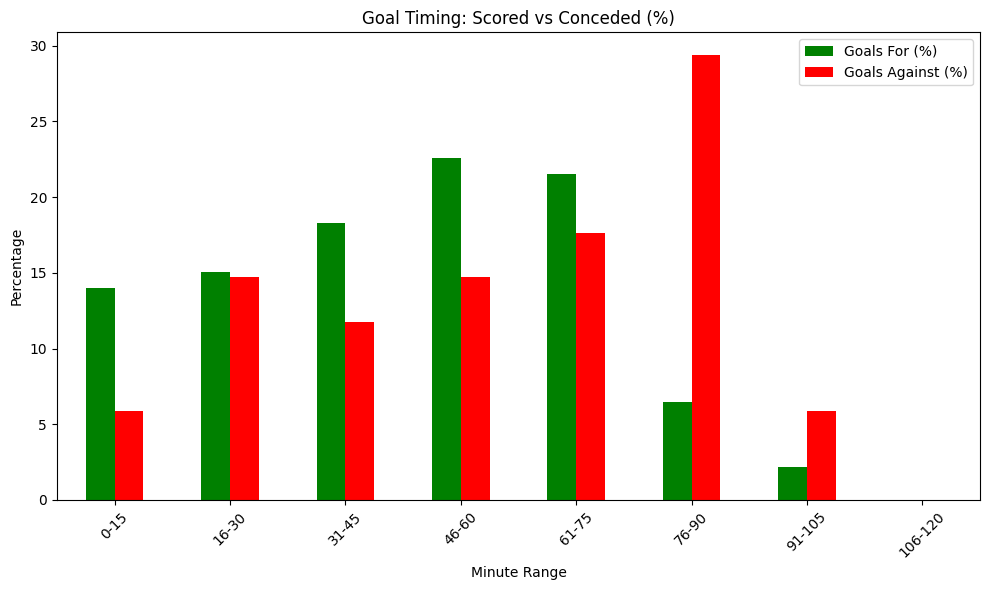


Net Goal Impact by Minute Range:
Minute Range  Net Impact (%)
        0-15            8.10
       16-30            0.34
       31-45            6.52
       46-60            7.87
       61-75            3.86
       76-90          -22.96
      91-105           -3.73
     106-120            0.00


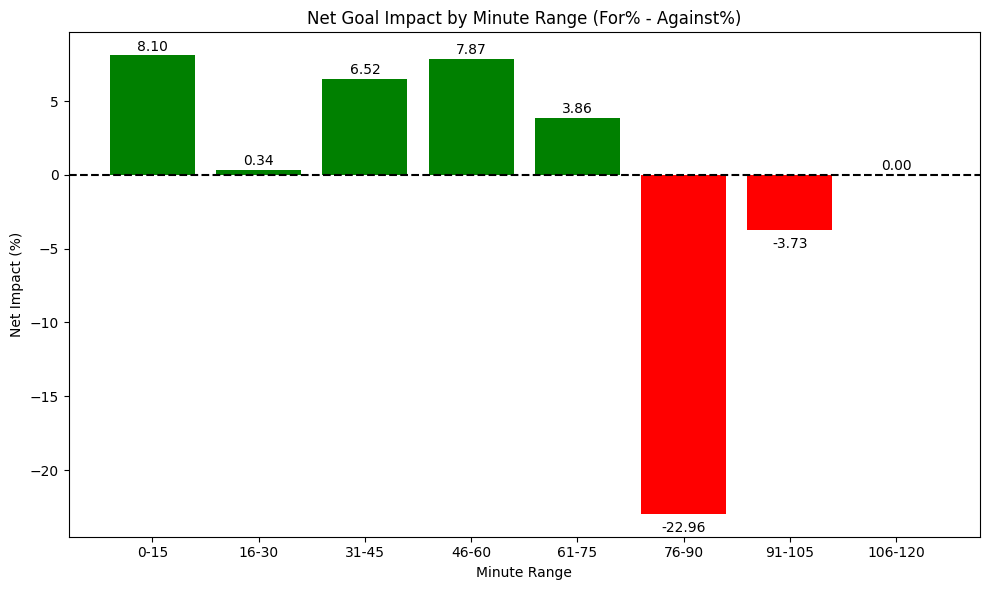

In [15]:
analyze_team_stats(team_stats)


# Summary

## 📈 Overall Performance
- **Matches Played:** 38  
- **Wins:** 28 | **Draws:** 5 | **Losses:** 5  
- **Win Rate:** **73.68%**  
- **Goal Difference:** **+61**  
- **Stronger at Home:** A commanding 60 goals scored at the Etihad versus 34 away.

---

## ⚽ Goals Overview
- **Total Goals Scored:** 94  
  - **Home:** 60  
  - **Away:** 34  
- **Total Goals Conceded:** 33  
  - **Home:** 17  
  - **Away:** 16  

---

## ⏱️ Goal Distribution by Minute Range

| Minute Range | Goals For | Goals Against | Net Impact |
|--------------|-----------|----------------|------------|
| 0–15         | 13        | 2              | **+11**    |
| 16–30        | 14        | 5              | +9         |
| 31–45        | 17        | 4              | +13        |
| 46–60        | 21        | 5              | **+16**    |
| 61–75        | 20        | 6              | +14        |
| 76–90        | 6         | 10             | **-4**     |
| 91–105       | 2         | 2              | 0          |
| 106–120      | 0         | 0              | 0          |

- **Most Dominant Periods:** 46–60 mins and 31–45 mins — excellent control around halftime.
- **Vulnerability:** Final 15 mins (76–90) saw a spike in goals conceded (10).

---

## 🧠 Formation Usage

| Formation  | Times Used |
|------------|-------------|
| 4-3-3      | 13          |
| 3-2-4-1    | 12          |
| 4-2-3-1    | 8           |
| 3-4-2-1    | 1           |
| 4-1-4-1    | 1           |
| 3-4-3      | 1           |
| 4-4-2      | 1           |
| 3-3-1-3    | 1           |

- **Favored Setup:** 4-3-3 — City's classic possession and pressing system.
- **Heavy Use of 3-2-4-1:** Reflects growing shift toward hybrid back-three systems.
- **Extreme Tactical Flexibility:** 8 formations used, including experimental shapes like 3-3-1-3.

---

## 🔍 Key Takeaways
- **Home Fortress:** Scored nearly double the goals at home than away.
- **First-Hour Mastery:** Most goals scored before the 60-minute mark.
- **Late-Game Slippage:** Conceded a third of their goals in the final 30 minutes.
- **Guardiola’s Tactical Range:** Continued experimentation with multiple formations, setting the stage for more fluid systems in 2023.

---
